## 2018-2019 season of the English Premier League

#### Description for Table Column

**Div**:	Division the game was played in

**Date**	The date the game was played

**HomeTeam**	The home team

**AwayTeam**	The away team

**FTHG**	Full time home goals

**FTAG**	Full time away goals

**FTR**	Full time result

**HTHG**	Half time home goals

**HTAG**	Half time away goals

**HTR**	Half time result

**Referee**	The referee of the game

**HS**	Number of shots taken by home team

**AS**	Number of shots taken by away team

**HST**	Number of shots taken by home team on target

**AST**	Number of shots taken by away team on target

**HF**	Number of fouls made by home team

**AF**	Number of fouls made by away team

**HC**	Number of corners taken by home team

**AC**	Number of corners taken by away team

**HY**	Number of yellow cards received by home team

**AY**	Number of yellow cards received by away team

**HR**	Number of red cards received by home team

**AR**	Number of red cards received by away team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

soccer_data = pd.read_csv("./data/soccer18-19.csv")
soccer_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


### What is an average winning rate that home team will win?
1. Display Final result of Game 
- H means home team wins
- A means away team wins
- D means equal score 

In [2]:
# game result
soccer_data["FTR"].head(10)

0    H
1    H
2    A
3    A
4    A
5    H
6    D
7    A
8    H
9    D
Name: FTR, dtype: object

In [3]:
# create boolean filter that home team win
bool = soccer_data["FTR"] == "H"
home_team_wins = soccer_data[bool]
home_team_wins

#this is the list that home team win the game

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
5,E0,11/8/18,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
11,E0,18/08/2018,Chelsea,Arsenal,3,2,H,2,2,D,...,11,6,12,9,5,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,E0,4/5/19,Wolves,Fulham,1,0,H,0,0,D,...,6,2,10,15,7,1,1,3,0,0
367,E0,5/5/19,Chelsea,Watford,3,0,H,0,0,D,...,9,3,6,12,6,6,0,1,0,0
369,E0,6/5/19,Man City,Leicester,1,0,H,0,0,D,...,5,2,12,5,11,0,3,2,0,0
372,E0,12/5/19,Crystal Palace,Bournemouth,5,3,H,3,1,H,...,8,8,11,8,4,4,3,0,0,0


In [4]:
# basic stat in "HomeTeam" column
home_team_wins["HomeTeam"].describe()

count          181
unique          20
top       Man City
freq            18
Name: HomeTeam, dtype: object

In [5]:
# top 5 the most winning team in home game
winning_team_at_home = dict()
home_team_wins_df = pd.DataFrame(home_team_wins["HomeTeam"])
for label,value in home_team_wins_df.iterrows():
    team = value["HomeTeam"]
    if team in winning_team_at_home:
        winning_team_at_home[team] += 1
    else:
        winning_team_at_home[team] = 1

for k in sorted(winning_team_at_home,key=winning_team_at_home.get, reverse=True):
    print(k,"wins",winning_team_at_home[k],"times at home ground")


Man City wins 18 times at home ground
Liverpool wins 17 times at home ground
Arsenal wins 14 times at home ground
Chelsea wins 12 times at home ground
Tottenham wins 12 times at home ground
Man United wins 10 times at home ground
Everton wins 10 times at home ground
Wolves wins 10 times at home ground
West Ham wins 9 times at home ground
Bournemouth wins 8 times at home ground
Watford wins 8 times at home ground
Leicester wins 8 times at home ground
Newcastle wins 8 times at home ground
Burnley wins 7 times at home ground
Brighton wins 6 times at home ground
Fulham wins 6 times at home ground
Cardiff wins 6 times at home ground
Crystal Palace wins 5 times at home ground
Southampton wins 5 times at home ground
Huddersfield wins 2 times at home ground


### calculate total count of home and away game

In [6]:
# home game
number_of_game_in_home = dict()
home_team_df = pd.DataFrame(soccer_data)["HomeTeam"]
home_count = 0 

# away game
number_of_game_in_away = dict()
away_team_df = pd.DataFrame(soccer_data)["AwayTeam"]
away_count = 0 

def calculate_total_game_count(dictionary,dataframe):
    for label,value in enumerate(dataframe):
        if value in dictionary:
            dictionary[value] += 1
        else:
            dictionary[value] = 1
    count = dictionary.get("Man City")
    return count

number_home_game = calculate_total_game_count(number_of_game_in_home,home_team_df)
number_away_game = calculate_total_game_count(number_of_game_in_away,away_team_df)
total_number_of_game = number_home_game + number_away_game
print("total number of game(home + away) is", total_number_of_game)

total number of game(home + away) is 38


### calculate winning rate in home game

In [7]:
number_of_game_in_home_df = pd.DataFrame.from_dict(number_of_game_in_home,orient="index",columns=["total home game count"])
winning_team_at_home_df = pd.DataFrame.from_dict(winning_team_at_home,orient = "index",columns=["wins count"])

#insert and combined dataframe with winning team datafame and number of game in home
winning_team_at_home_df.insert(1,"total home game count",number_of_game_in_home_df["total home game count"])

#calculate winning rate for home ground game
winning_team_at_home_df["winning rate (%)"] = round(winning_team_at_home_df["wins count"] * 100 / (winning_team_at_home_df["total home game count"]),2)
sorted_df = winning_team_at_home_df.sort_values(by="winning rate (%)",ascending=False)
sorted_df

,wins count,total home game count,winning rate (%)
Man City,18,19,94.74
Liverpool,17,19,89.47
Arsenal,14,19,73.68
Tottenham,12,19,63.16
Chelsea,12,19,63.16
Wolves,10,19,52.63
Man United,10,19,52.63
Everton,10,19,52.63
West Ham,9,19,47.37
Leicester,8,19,42.11


### Winning Rate in the home ground
The best team of winning rate in home ground is **Man City.** They have **94.74%** rate to win in home ground and the worst team of winning in the home ground is **Huddersfield** which is **10.53%** as winning rate 

### Visualization for winning rate by teams

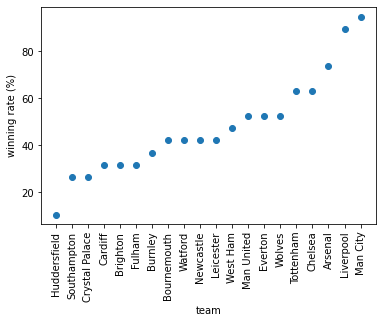

In [8]:
df_for_plot = winning_team_at_home_df.sort_values(by="winning rate (%)",ascending=True)
plt.scatter(df_for_plot.index,df_for_plot["winning rate (%)"])
plt.xticks(rotation=90)
plt.xlabel("team")
plt.ylabel("winning rate (%)")
plt.show()